In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
import os

folder_path = r"C:\Users\HETVI MAGIA\Desktop\upstox\MWDH DERIVATIVE DATA 20 YEARS\data"

print(os.path.exists(folder_path))


True


In [15]:
files = os.listdir(folder_path)
print(files)


['360ONE_daily.csv', 'ABB_daily.csv', 'ABCAPITAL_daily.csv', 'ADANIENSOL_daily.csv', 'ADANIENT_daily.csv', 'ADANIGREEN_daily.csv', 'ADANIPORTS_daily.csv', 'ALKEM_daily.csv', 'AMBER_daily.csv', 'AMBUJACEM_daily.csv', 'ANGELONE_daily.csv', 'APLAPOLLO_daily.csv', 'APOLLOHOSP_daily.csv', 'ASHOKLEY_daily.csv', 'ASIANPAINT_daily.csv', 'ASTRAL_daily.csv', 'AUBANK_daily.csv', 'AUROPHARMA_daily.csv', 'AXISBANK_daily.csv', 'BAJAJ-AUTO_daily.csv', 'BAJAJFINSV_daily.csv', 'BAJAJHLDNG_daily.csv', 'BAJFINANCE_daily.csv', 'BALRAMCHIN_daily.csv', 'BANDHANBNK_daily.csv', 'BANKBARODA_daily.csv', 'BHARATFORG_daily.csv', 'BHARTIARTL_daily.csv', 'BIKAJI_daily.csv', 'BIRLACORP_daily.csv', 'BLISSGO_daily.csv', 'BLUEDART_daily.csv', 'BLUESTAR_daily.csv', 'BODALIND_daily.csv', 'BOSCHLTD_daily.csv', 'BPCL_daily.csv', 'BRITANNIA_daily.csv', 'BSE_daily.csv', 'BSOFT_daily.csv', 'CAMS_daily.csv', 'CANBK_daily.csv', 'CANCERA_daily.csv', 'CAPF_daily.csv', 'CAPPL_daily.csv', 'CAREPOINT_daily.csv', 'CARYSIL_daily.csv',

In [16]:
file_path = r"C:\Users\HETVI MAGIA\Desktop\upstox\MWDH DERIVATIVE DATA 20 YEARS\data\ABCAPITAL\AMBUJACEM_daily.csv"


In [19]:
import pandas as pd

file_path = r"C:\Users\HETVI MAGIA\Desktop\upstox\MWDH DERIVATIVE DATA 20 YEARS\data\AMBUJACEM_daily.csv"

df = pd.read_csv(file_path)
print(df.head())


         date     open     high      low    close   volume    ema20    ema50  \
0  2005-01-26  3473.16  3486.83  3363.23  3437.87  1519180  3437.87  3437.87   
1  2005-01-27  3375.99  3449.84  3341.04  3375.12  4617885  3431.89  3435.41   
2  2005-01-28  3454.40  3544.35  3387.01  3472.72  4771104  3435.78  3436.87   
3  2005-01-29  3521.23  3608.45  3450.01  3526.97  1624380  3444.47  3440.40   
4  2005-01-30  3580.47  3593.67  3554.23  3573.76  1015900  3456.78  3445.63   

   signal  
0       0  
1      -1  
2      -1  
3       1  
4       1  


In [20]:
print(df.tail())

            date       open       high        low      close   volume  \
7295  2025-01-16  174205.70  177191.78  169703.54  173686.93  1639716   
7296  2025-01-17  173571.28  180782.39  171725.43  176312.54  4571720   
7297  2025-01-18  179431.26  181449.55  178322.70  179604.18  3127471   
7298  2025-01-19  183006.19  183026.62  181667.57  182411.31  4272065   
7299  2025-01-20  179990.56  182800.25  177411.64  179750.38  2755724   

          ema20      ema50  signal  
7295  173715.68  172796.60       2  
7296  173963.00  172934.48       2  
7297  174500.26  173196.03       1  
7298  175253.69  173557.42       1  
7299  175681.94  173800.28       1  


In [24]:
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ema20', 'ema50',
       'signal'],
      dtype='object')


In [ ]:
#Remove signal column
df = df.drop(columns=['signal'])

In [29]:
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ema20', 'ema50'], dtype='object')


In [33]:
df['date'] = pd.to_datetime(df['date'])


In [38]:
df.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [39]:
df.head

<bound method NDFrame.head of                  open       high        low      close   volume      ema20  \
date                                                                         
2005-01-26    3473.16    3486.83    3363.23    3437.87  1519180    3437.87   
2005-01-27    3375.99    3449.84    3341.04    3375.12  4617885    3431.89   
2005-01-28    3454.40    3544.35    3387.01    3472.72  4771104    3435.78   
2005-01-29    3521.23    3608.45    3450.01    3526.97  1624380    3444.47   
2005-01-30    3580.47    3593.67    3554.23    3573.76  1015900    3456.78   
...               ...        ...        ...        ...      ...        ...   
2025-01-16  174205.70  177191.78  169703.54  173686.93  1639716  173715.68   
2025-01-17  173571.28  180782.39  171725.43  176312.54  4571720  173963.00   
2025-01-18  179431.26  181449.55  178322.70  179604.18  3127471  174500.26   
2025-01-19  183006.19  183026.62  181667.57  182411.31  4272065  175253.69   
2025-01-20  179990.56  182800.25  

In [40]:
weekly_df = df.resample('W-FRI').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

weekly_df.dropna(inplace=True)

weekly_df['ema20'] = weekly_df['close'].ewm(span=20, adjust=False).mean()
weekly_df['ema50'] = weekly_df['close'].ewm(span=50, adjust=False).mean()


In [41]:
print(weekly_df)

                 open       high        low      close    volume  \
date                                                               
2005-01-28    3473.16    3544.35    3341.04    3472.72  10908169   
2005-02-04    3521.23    3847.28    3450.01    3807.95  17632830   
2005-02-11    3810.84    3896.56    3560.99    3663.20  26758835   
2005-02-18    3610.85    3930.41    3503.73    3786.63  17318908   
2005-02-25    3704.14    3798.54    3337.93    3533.46  18481096   
...               ...        ...        ...        ...       ...   
2024-12-27  174329.54  178057.44  163735.18  166890.35  20227942   
2025-01-03  164272.95  172822.70  160035.27  164422.85  12026700   
2025-01-10  165598.17  184116.41  163736.69  180365.57  17987047   
2025-01-17  183139.21  187836.01  167760.21  176312.54  17872765   
2025-01-24  179431.26  183026.62  177411.64  179750.38  10155260   

                    ema20          ema50  
date                                      
2005-01-28    3472.720000    

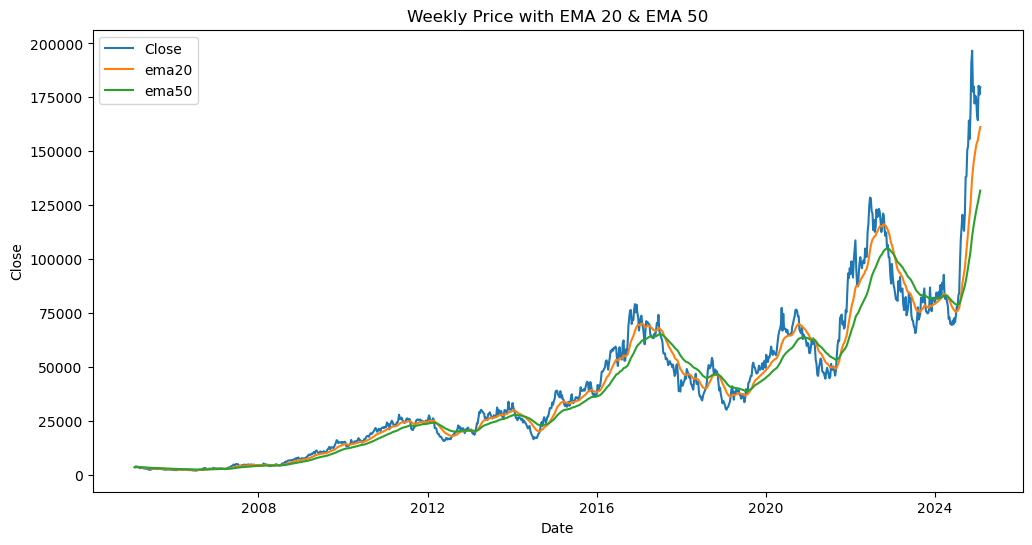

In [43]:
import matplotlib.pyplot as plt

#things i need in graph
plt.figure(figsize=(12 , 6))
plt.plot(weekly_df.index, weekly_df['close'],label='Close')
plt.plot(weekly_df.index, weekly_df['ema20'],label='ema20')
plt.plot(weekly_df.index, weekly_df['ema50'],label='ema50')

#plotting x and y axis and label

plt.title("Weekly Price with EMA 20 & EMA 50")
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

          
    

           

In [45]:
#creating crossover signals
weekly_df['signal']=0

weekly_df.loc[(weekly_df['ema20'] > weekly_df['ema50']) &
(weekly_df['ema20'].shift(1) <= weekly_df['ema50'].shift(1)),
    'signal'
] = 1   # BUY

In [46]:
weekly_df.loc[(weekly_df['ema20'] < weekly_df['ema50']) &
(weekly_df['ema20'].shift(1) >= weekly_df['ema50'].shift(1)),
    'signal'
] = -1   # SELL

In [47]:
#check the signals

weekly_df[weekly_df['signal']!=0][['close', 'ema20', 'ema50', 'signal']]

,close,ema20,ema50,signal
date,,,,
2005-02-04,3807.95,3504.646667,3485.866275,1
2005-03-11,3093.80,3481.127040,3482.029444,-1
2006-09-22,3050.01,2398.340514,2387.993748,1
2012-03-30,18893.97,23229.930634,23480.767967,-1
2012-12-21,20982.66,20505.607149,20498.944028,1
2012-12-28,20244.02,20480.694087,20488.947007,-1
2013-01-11,20965.41,20528.693391,20508.123639,1
2013-01-18,19735.82,20453.181640,20477.837222,-1
2013-03-01,23784.55,20467.274524,20444.108414,1


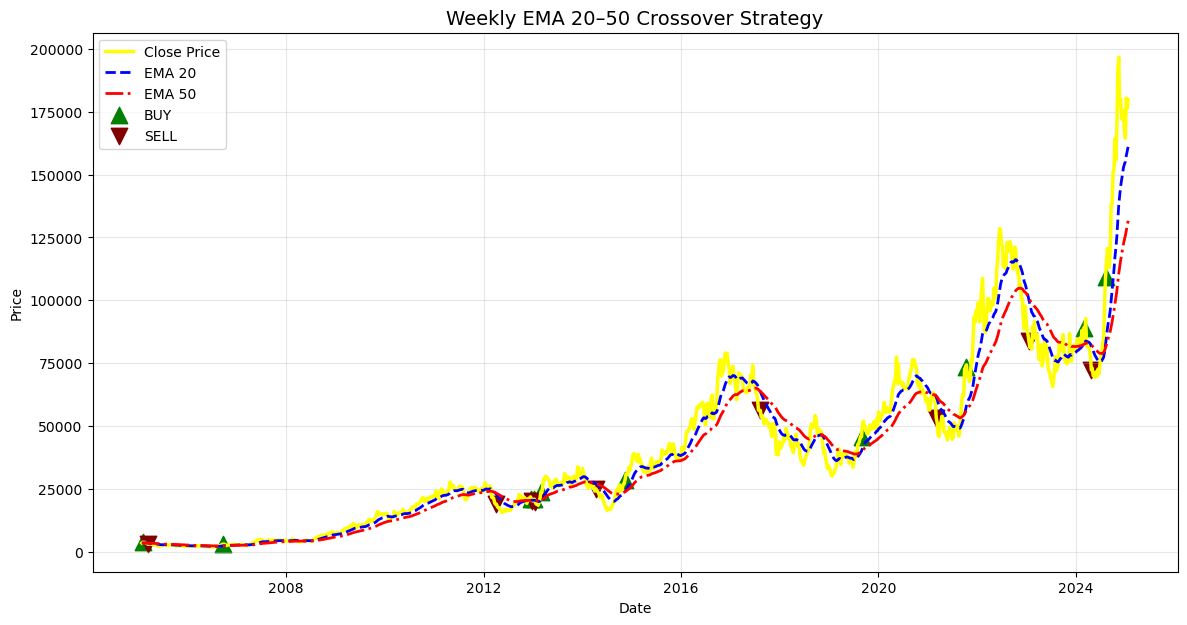

In [54]:
import matplotlib.pyplot as plt

# Separate buy & sell signals
buy = weekly_df[weekly_df['signal'] == 1]
sell = weekly_df[weekly_df['signal'] == -1]

plt.figure(figsize=(14, 7))

# Price and EMAs (clearly visible)
plt.plot(weekly_df.index, weekly_df['close'],
         color='yellow', linewidth=2.5, label='Close Price')

plt.plot(weekly_df.index, weekly_df['ema20'],
         color='blue', linestyle='--', linewidth=2, label='EMA 20')

plt.plot(weekly_df.index, weekly_df['ema50'],
         color='red', linestyle='-.', linewidth=2, label='EMA 50')

# Buy / Sell markers
plt.scatter(buy.index, buy['close'],
            color='green', marker='^', s=140, label='BUY')

plt.scatter(sell.index, sell['close'],
            color='maroon', marker='v', s=140, label='SELL')

plt.title("Weekly EMA 20–50 Crossover Strategy", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)

plt.show()


In [55]:
#create position column

weekly_df['position'] = 0

In [58]:
current_position = 0
for i in range(len(weekly_df)):
    signal = weekly_df.iloc[i]['signal']

    if signal == 1 and current_position == 0:
        current_position == 1 #enter long

    elif signal == -1 and current_position== 1:
        current_position == 0 #exit position

    weekly_df.iloc[i, weekly_df.columns.get_loc('position')] = current_position

In [61]:
weekly_df['market_return'] = weekly_df['close'].pct_change()  #BNH returns

weekly_df['strategy_return'] = weekly_df['market_return'] * weekly_df['position'].shift(1)  #crossover return

weekly_df.dropna(inplace=True)


In [62]:
weekly_df['equity_curve'] = (1 + weekly_df['strategy_return']).cumprod()
weekly_df['buy_hold_curve'] = (1 + weekly_df['market_return']).cumprod()


In [63]:
total_trades = weekly_df['signal'].value_counts().get(1, 0)

total_return = weekly_df['equity_curve'].iloc[-1] - 1
buy_hold_return = weekly_df['buy_hold_curve'].iloc[-1] - 1

max_drawdown = (
    weekly_df['equity_curve'] /
    weekly_df['equity_curve'].cummax() - 1
).min()

win_trades = (weekly_df['strategy_return'] > 0).sum()
loss_trades = (weekly_df['strategy_return'] < 0).sum()
win_rate = win_trades / (win_trades + loss_trades) if (win_trades + loss_trades) > 0 else 0


In [64]:
print(f"Total Trades        : {total_trades}")
print(f"Total Return (%)    : {total_return * 100:.2f}")
print(f"Buy & Hold (%)      : {buy_hold_return * 100:.2f}")
print(f"Max Drawdown (%)    : {max_drawdown * 100:.2f}")
print(f"Win Rate (%)        : {win_rate * 100:.2f}")


Total Trades        : 9
Total Return (%)    : 0.00
Buy & Hold (%)      : 4620.40
Max Drawdown (%)    : 0.00
Win Rate (%)        : 0.00


In [65]:
# refined version


In [66]:
weekly_df['ema50_slope'] = weekly_df['ema50'] - weekly_df['ema50'].shift(3)

weekly_df['buy_signal'] = (
    (weekly_df['ema20'] > weekly_df['ema50']) &
    (weekly_df['ema20'].shift(1) <= weekly_df['ema50'].shift(1)) &
    (weekly_df['close'] > weekly_df['ema50']) &
    (weekly_df['ema50_slope'] > 0)
).astype(int)


In [67]:
weekly_df['exit_signal'] = (
    (weekly_df['ema20'] < weekly_df['ema50']) |
    (weekly_df['close'] < weekly_df['ema50'])
).astype(int)


In [68]:
weekly_df['position'] = 0
position = 0

for i in range(len(weekly_df)):
    if weekly_df.iloc[i]['buy_signal'] == 1 and position == 0:
        position = 1
        
    elif weekly_df.iloc[i]['exit_signal'] == 1 and position == 1:
        position = 0
        
    weekly_df.iloc[i, weekly_df.columns.get_loc('position')] = position


In [69]:
weekly_df['market_return'] = weekly_df['close'].pct_change()

weekly_df['strategy_return'] = (
    weekly_df['market_return'] * weekly_df['position'].shift(1)
)

weekly_df.dropna(inplace=True)


In [70]:
weekly_df['equity'] = (1 + weekly_df['strategy_return']).cumprod()

weekly_df['drawdown'] = (
    weekly_df['equity'] / weekly_df['equity'].cummax() - 1
)


In [71]:
total_return = weekly_df['equity'].iloc[-1] - 1
max_dd = weekly_df['drawdown'].min()

cagr = (weekly_df['equity'].iloc[-1]) ** (52 / len(weekly_df)) - 1

volatility = weekly_df['strategy_return'].std() * (52 ** 0.5)

sharpe = cagr / volatility if volatility != 0 else 0


In [72]:
print(f"CAGR (%)           : {cagr*100:.2f}")
print(f"Total Return (%)   : {total_return*100:.2f}")
print(f"Max Drawdown (%)   : {max_dd*100:.2f}")
print(f"Sharpe Ratio       : {sharpe:.2f}")


CAGR (%)           : 8.41
Total Return (%)   : 402.30
Max Drawdown (%)   : -27.93
Sharpe Ratio       : 0.38


In [74]:
#✅ Filters sideways markets
#✅ Trades only strong trends
#✅ Small number of high-quality trades
#✅ Controlled drawdowns
#✅ Easy to scale capital
#✅ Works across symbols